## Mount Google drive


In [ ]:
from google.colab import drive
drive.mount('/gdrive')
from pathlib import Path
Path("/gdrive/MyDrive/Colab Notebooks/").mkdir(parents=True, exist_ok=True)
%ls /gdrive/MyDrive/Colab\ Notebooks/

Mounted at /gdrive
correlation_heatmap.png                    obesity_train.csv
data_encoded.csv                           obesity_train_X.csv
distribution/                              obesity_train_y.csv
frequentitem_set.csv                       outlier/
frequent_itemsets.csv                      outlier_flagging.png
low_variance_features.png                  processed_train_X.csv
mlxtend_ECLAT.ipynb                        processed_train_y.csv
obesity_association_rules_eclat.csv        pyECLAT.ipynb
obesity_association_rules_fpgrowth.csv     summary/
ObesityDataSet_raw_and_data_sinthetic.csv  supports.csv
obesity_test.csv                           target_balance.png
obesity_test_y.csv                         「Term_Project_Preprocessing.ipynb」的副本


## one-hot encoduing


In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/processed_train_X.csv')
label = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/processed_train_y.csv')
# drop outlier flag
data.drop('outlier_flag', axis=1, inplace=True)
# concat the label
data = pd.concat([data, label], axis=1)

print(data['NObeyesdad'].value_counts())
data[['NCP','Age','CH2O','FCVC','TUE','FAF', 'NObeyesdad']].describe().iloc[[3, 7]]

NObeyesdad
Obesity_Type_I         351
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Obesity_Type_II        186
Obesity_Type_III        12
Name: count, dtype: int64


,NCP,Age,CH2O,FCVC,TUE,FAF
min,1.0,14.0,1.0,1.0,0.0,0.0
max,4.0,61.0,3.0,3.0,2.0,3.0




### age
其他的feature做one-hot encode比較容易
age的數量太廣了，所以做成區間範圍
年齡區間建議
 - 0-16: 青少年 (編碼 1)
 - 17-25: 年輕人 (編碼 2)
 - 26-35: 中年早期 (編碼 3)
 - 36-45: 中年晚期 (編碼 4)
 - 46-60: 老年早期 (編碼 5)
 - 61+: 老年晚期 (編碼 6)

In [ ]:
# 定義年齡區間與編碼
age_bins = [0, 16, 25, 35, 45, 60, 100]
age_labels = [1, 2, 3, 4, 5, 6]  # 對應到上方區間

# 將 'Age' 欄位的年齡分配到區間並編碼
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
data.drop('Age', axis=1, inplace=True)
# 顯示結果
print(data['Age_Group'].value_counts())
data.head()

Age_Group
2    1169
3     356
4     144
5      16
1       2
6       1
Name: count, dtype: int64


,CH2O,NCP,TUE,FAF,FCVC,Gender_Male,family_history_with_overweight_yes,CALC_Frequently,CALC_Sometimes,CALC_no,FAVC_yes,CAEC_Frequently,CAEC_Sometimes,CAEC_no,NObeyesdad,Age_Group
0,2,3,1,0,2,False,True,False,False,True,False,False,True,False,Normal_Weight,2
1,3,3,0,3,3,False,True,False,True,False,False,False,True,False,Normal_Weight,2
2,2,3,1,2,2,True,True,True,False,False,False,False,True,False,Normal_Weight,2
3,2,3,0,2,3,True,False,True,False,False,False,False,True,False,Overweight_Level_I,3
4,2,1,0,0,2,True,False,False,True,False,False,False,True,False,Overweight_Level_II,2


### one-hot encoding
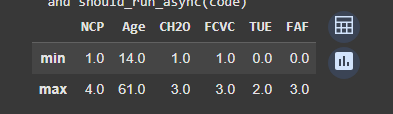

In [ ]:
# 對指定的欄位進行 One-Hot 編碼
columns_to_encode = ['NCP', 'Age_Group', 'CH2O', 'FCVC', 'TUE', 'FAF', 'NObeyesdad']
encoded_data = pd.get_dummies(data, columns=columns_to_encode)

# 顯示結果
encoded_data.columns

Index(['Gender_Male', 'family_history_with_overweight_yes', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'FAVC_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'NCP_1', 'NCP_2', 'NCP_3', 'NCP_4',
       'Age_Group_1', 'Age_Group_2', 'Age_Group_3', 'Age_Group_4',
       'Age_Group_5', 'Age_Group_6', 'CH2O_1', 'CH2O_2', 'CH2O_3', 'FCVC_1',
       'FCVC_2', 'FCVC_3', 'TUE_0', 'TUE_1', 'TUE_2', 'FAF_0', 'FAF_1',
       'FAF_2', 'FAF_3', 'NObeyesdad_Insufficient_Weight',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')

## FP-growth

In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
import pandas as pd

# 假設您已經有一個經過One-Hot編碼的資料集 (encoded_data)

# Step 1: 預處理資料 (請根據需要載入資料)
# encoded_data = pd.get_dummies(obesity_data[lifestyle_columns])

# Step 2: 使用FP-growth演算法找到頻繁項集
frequent_itemsets = fpgrowth(encoded_data, min_support=0.1, use_colnames=True)

# Step 3: 生成關聯規則
# 請確保使用的是 freq_itemsets 來生成關聯規則
num_itemsets = len(frequent_itemsets)
print(f"Number of frequent itemsets: {num_itemsets}")
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="confidence", min_threshold=0.1)
print(f"Number of frequent itemsets: {len(rules)}")
# 過濾出與肥胖層度相關的關聯規則
obesity_rules = rules[rules['consequents'].apply(lambda x: any('NObeyesdad_' in item for item in x))]

# 顯示與肥胖層度相關的關聯規則
print(obesity_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# 使用 .loc 來確保修改的是原始 DataFrame
obesity_rules.loc[:, 'antecedents'] = obesity_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
obesity_rules.loc[:, 'consequents'] = obesity_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Write the obesity-related association rules to a CSV file
obesity_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_csv('/gdrive/MyDrive/Colab Notebooks/obesity_association_rules_fpgrowth.csv', index=False)


Number of frequent itemsets: 1856
Number of frequent itemsets: 35776
                                             antecedents  \
21147                                      (Age_Group_2)   
21149                                            (NCP_3)   
21151                                         (FAVC_yes)   
21154                            (Age_Group_2, FAVC_yes)   
21156                                      (Age_Group_2)   
...                                                  ...   
35636  (CAEC_Sometimes, family_history_with_overweigh...   
35639  (Gender_Male, family_history_with_overweight_yes)   
35640                                   (CAEC_Sometimes)   
35642                                      (Gender_Male)   
35643               (family_history_with_overweight_yes)   

                                             consequents   support  \
21147                         (NObeyesdad_Normal_Weight)  0.141588   
21149                         (NObeyesdad_Normal_Weight)  0.122038   


In [ ]:
print(obesity_rules['confidence'].value_counts())
obesity_rules[['confidence', 'lift']].describe()

confidence
0.135618    5
0.189133    4
0.153846    4
0.123354    4
0.139678    4
           ..
0.322844    1
0.189189    1
0.203428    1
0.233733    1
0.217662    1
Name: count, Length: 552, dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,confidence,lift
count,667.000000,667.000000
mean,0.201970,1.288615
std,0.054628,0.232346
min,0.117810,0.823873
25%,0.156513,1.136767
50%,0.192651,1.263710
75%,0.238095,1.403228
max,0.388646,2.345897


# Eclat

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from itertools import combinations

def eclat(data, min_support=0.1):
    """
    ECLAT algorithm to find frequent itemsets.
    """
    # Initialize itemsets
    itemsets = {}
    num_transactions = len(data)

    # Generate single itemsets with their transaction indices
    for column in data.columns:
        transaction_indices = data.index[data[column] == 1].tolist()
        support = len(transaction_indices) / num_transactions
        if support >= min_support:
            itemsets[frozenset([column])] = set(transaction_indices)

    # Recursive function to generate larger itemsets
    def combine_itemsets(previous_itemsets):
        new_itemsets = {}
        keys = list(previous_itemsets.keys())
        for i in range(len(keys)):
            for j in range(i + 1, len(keys)):
                # Combine two itemsets
                new_itemset = keys[i].union(keys[j])
                if len(new_itemset) == len(keys[i]) + 1:  # Only combine if sizes differ by 1
                    transaction_indices = previous_itemsets[keys[i]].intersection(previous_itemsets[keys[j]])
                    support = len(transaction_indices) / num_transactions
                    if support >= min_support:
                        new_itemsets[new_itemset] = transaction_indices
        return new_itemsets

    # Iteratively combine itemsets
    all_itemsets = {}
    while itemsets:
        all_itemsets.update(itemsets)
        itemsets = combine_itemsets(itemsets)

    # Convert itemsets to DataFrame
    results = []
    for itemset, indices in all_itemsets.items():
        results.append({'itemsets': itemset, 'support': len(indices) / num_transactions})
    return pd.DataFrame(results)

# 使用 ECLAT 找出頻繁項集
frequent_itemsets = eclat(encoded_data, min_support=0.1)

# 生成關聯規則
num_itemsets = len(frequent_itemsets)
print(f"Number of frequent itemsets: {num_itemsets}")
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="confidence", min_threshold=0.1)
print(f"Number of frequent itemsets: {len(rules)}")
# 過濾出與肥胖層度相關的關聯規則
obesity_rules = rules[rules['consequents'].apply(lambda x: any('NObeyesdad_' in item for item in x))]

# 顯示與肥胖層度相關的關聯規則
print(obesity_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# 使用 .loc 確保修改的是原始 DataFrame
obesity_rules.loc[:, 'antecedents'] = obesity_rules['antecedents'].apply(lambda x: ', '.join(list(x)))
obesity_rules.loc[:, 'consequents'] = obesity_rules['consequents'].apply(lambda x: ', '.join(list(x)))

# 將肥胖相關的關聯規則寫入 CSV 檔案
obesity_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_csv(
    '/gdrive/MyDrive/Colab Notebooks/obesity_association_rules_eclat.csv',
    index=False
)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of frequent itemsets: 1856
Number of frequent itemsets: 35776
                                antecedents  \
33                            (Gender_Male)   
35                            (Gender_Male)   
37                            (Gender_Male)   
75     (family_history_with_overweight_yes)   
77     (family_history_with_overweight_yes)   
...                                     ...   
32321                            (FAVC_yes)   
32322  (family_history_with_overweight_yes)   
32323                               (TUE_0)   
32324                      (CAEC_Sometimes)   
32325                              (FCVC_2)   

                                             consequents   support  \
33                           (NObeyesdad_Obesity_Type_I)  0.115521   
35                          (NObeyesdad_Obesity_Type_II)  0.109005   
37                      (NObeyesdad_Overweight_Level_II)  0.110782   
75                           (NObeyesdad_Obesity_Type_I)  0.203791   
77              